# Aufgabe 8
### a)

Population 0:  
2D Gaußverteilung mit $\mu_x = 0, \mu_y = 3, \sigma_x = 3,5, \sigma_y = 2,6, \rho = 0,9$  
Der Korrelationskoeffizient ist $$ \rho = \frac{ cov(x,y) }{ \sigma_x \sigma_y } \leftrightarrow cov(x,y) = \rho \sigma_x \sigma_y = 0,9\cdot 3,5 \cdot 2,6 = 8,19. $$  
Damit ist die Kovarianzmatrix $$ cov_0(X, Y) = \begin{pmatrix} 3,5^2 & 8,19 \\ 8,19 & 2,6^2 \end{pmatrix}. $$

Population 1:  
Gaußverteilung in x mit $\mu_x = 6, \sigma_x = 3,5$ und Gaußverteilung in y, deren Mittelwert linear von x abhängt: $$ \mu_y = a + bx, cov(x,y) = 1 $$ mit $ a = 0,5, b = 0,6. $

Wir brauchen wieder die Kovarianzmatrix, hier also nur noch $\sigma_y^2$.  
$$\sigma_y^2 = <y^2> - <y>^2 = <(a+bx)^2> - <a+bx>^2 = <a^2+2abx+b^2x^2> - <a+bx>^2 \\ 
= <a^2> + <2abx> + <b^2x^2> - <a^2> - 2<a><bx> -<bx>^2 \\ 
= b^2(<x^2>-<x>^2) = b^2\sigma_x^2 = 4,41.$$  
Damit ist die Kovarianzmatrix  $$ cov_1(X, Y) = \begin{pmatrix} 3,5^2 & 1 \\ 1 & 4,41 \end{pmatrix}. $$

#### Leider wussten wir nicht, wie man diesen Mittelwert von x abhängig plotten soll, daher haben wir den Mittelwert von x eingesetzt

In [48]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
mean_0 = [0,3]
a, b = 0.5, 0.6
mean_1 = [6, a+b*6]
cov_0 = [[3.5**2, 8.19], [8.19, 2.6**2]]
cov_1 = [[3.5**2, 1], [1, 4.41]]

In [38]:
np.random.seed(42)
pop_0x, pop_0y = np.random.multivariate_normal(mean = mean_0, cov = cov_0, size = 10000).T
pop_1x, pop_1y = np.random.multivariate_normal(mean = mean_1, cov = cov_1, size = 10000).T

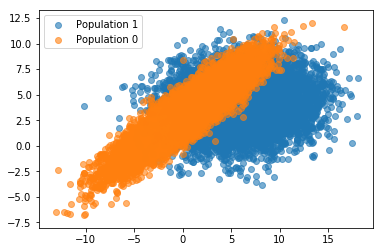

In [25]:
plt.scatter(pop_1x, pop_1y, label='Population 1', alpha=0.6)
plt.scatter(pop_0x, pop_0y, label='Population 0', alpha=0.6)
plt.legend()

### b)

Berechnen Sie die Stichproben-Mittelwerte und -Varianzen von 𝑥 und 𝑦 sowie die Stichproben-Kovarianz und den -Korrelationskoeffizienten für die Einzelpopulationen und die Gesamtheit beider Population.

Population 1:
Stichprobenmittelwerte:

In [28]:
mean_0x = np.mean(pop_0x)
mean_0y = np.mean(pop_0y)
mean_0x, mean_0y

(0.013844934918172017, 2.996161571367836)

Stichprobenkovarianzen: 
Es gilt $$cov(x,y) = E(x\cdot y)-E(x)\cdot E(y).$$
Also $$ \sigma_x^2 = E(x^2) - E(x)^2.$$

In [40]:
pop_0x2 = pop_0x**2
pop_0y2 = pop_0y**2
sigma_0x2 = np.mean(pop_0x2) - np.mean(pop_0x)**2
sigma_0y2 = np.mean(pop_0y2) - np.mean(pop_0y)**2
sigma_0x2, sigma_0y2

(12.501996248659207, 6.903408680222455)

Kovarianzen: 

In [39]:
pop_0xy = pop_0x * pop_0y
cov_0xy = np.mean(pop_0xy) - np.mean(pop_0x)*np.mean(pop_0y)
cov_0xy

8.39272716597535

Oder mit der äquivalenten Formel von Wikipedia:

In [47]:
1/len(pop_0x)*sum( (pop_0x-np.mean(pop_0x))*(pop_0y-np.mean(pop_0y)) )

8.392727165975378